📊 Vorschau:
   Publishing_Year                        Book_Name  \
0             1975                          Beowulf   
1             1987                 Batman: Year One   
2             2015                Go Set a Watchman   
3             2008  When You Are Engulfed in Flames   
4             2011         Daughter of Smoke & Bone   

                                              Author Language_Code  \
0                             Unknown, Seamus Heaney            en   
1  Frank Miller, David Mazzucchelli, Richmond Lew...            en   
2                                         Harper Lee            en   
3                                      David Sedaris            en   
4                                       Laini Taylor            en   

  Author_Rating  Average_Rating  Rating_Count  Gross_Sales_EUR  \
0        Novice            3.42        155903          34160.0   
1  Intermediate            4.23        145267          12437.5   
2        Novice            3.31       

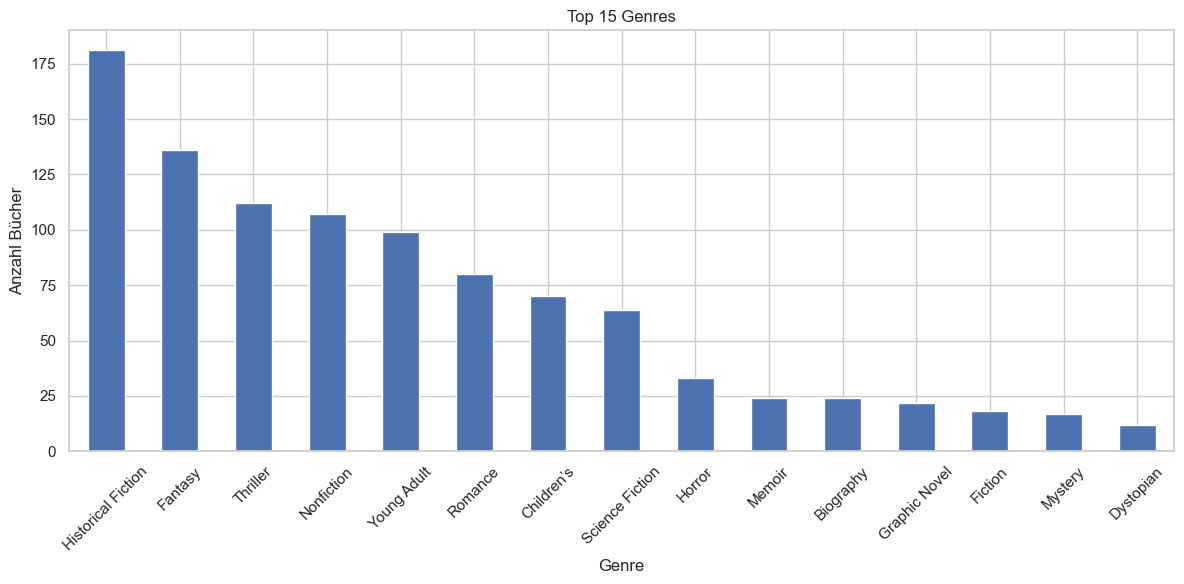

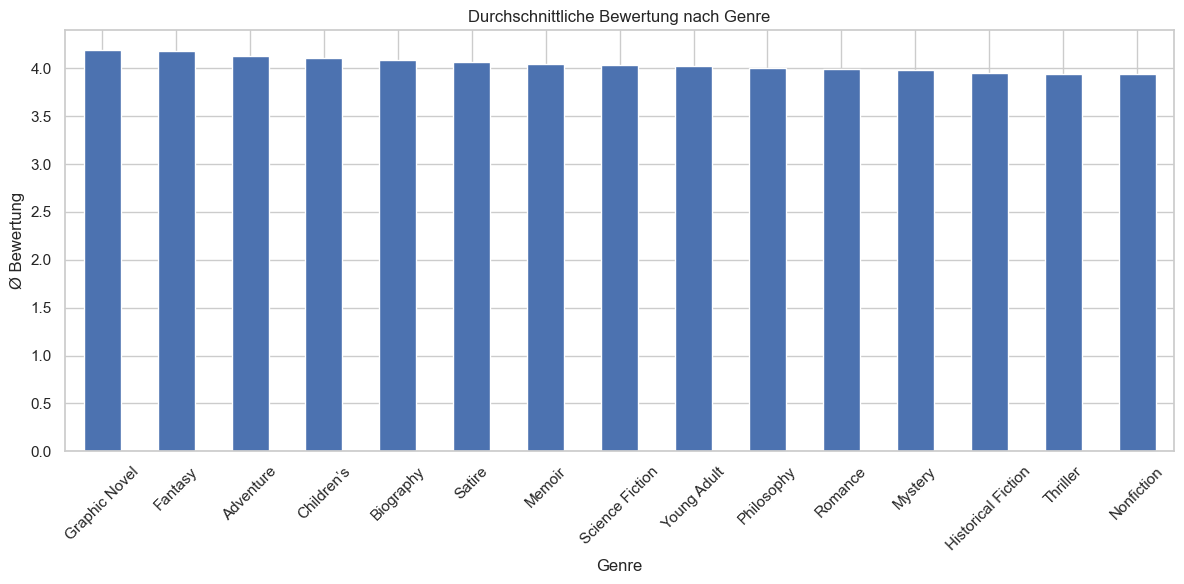

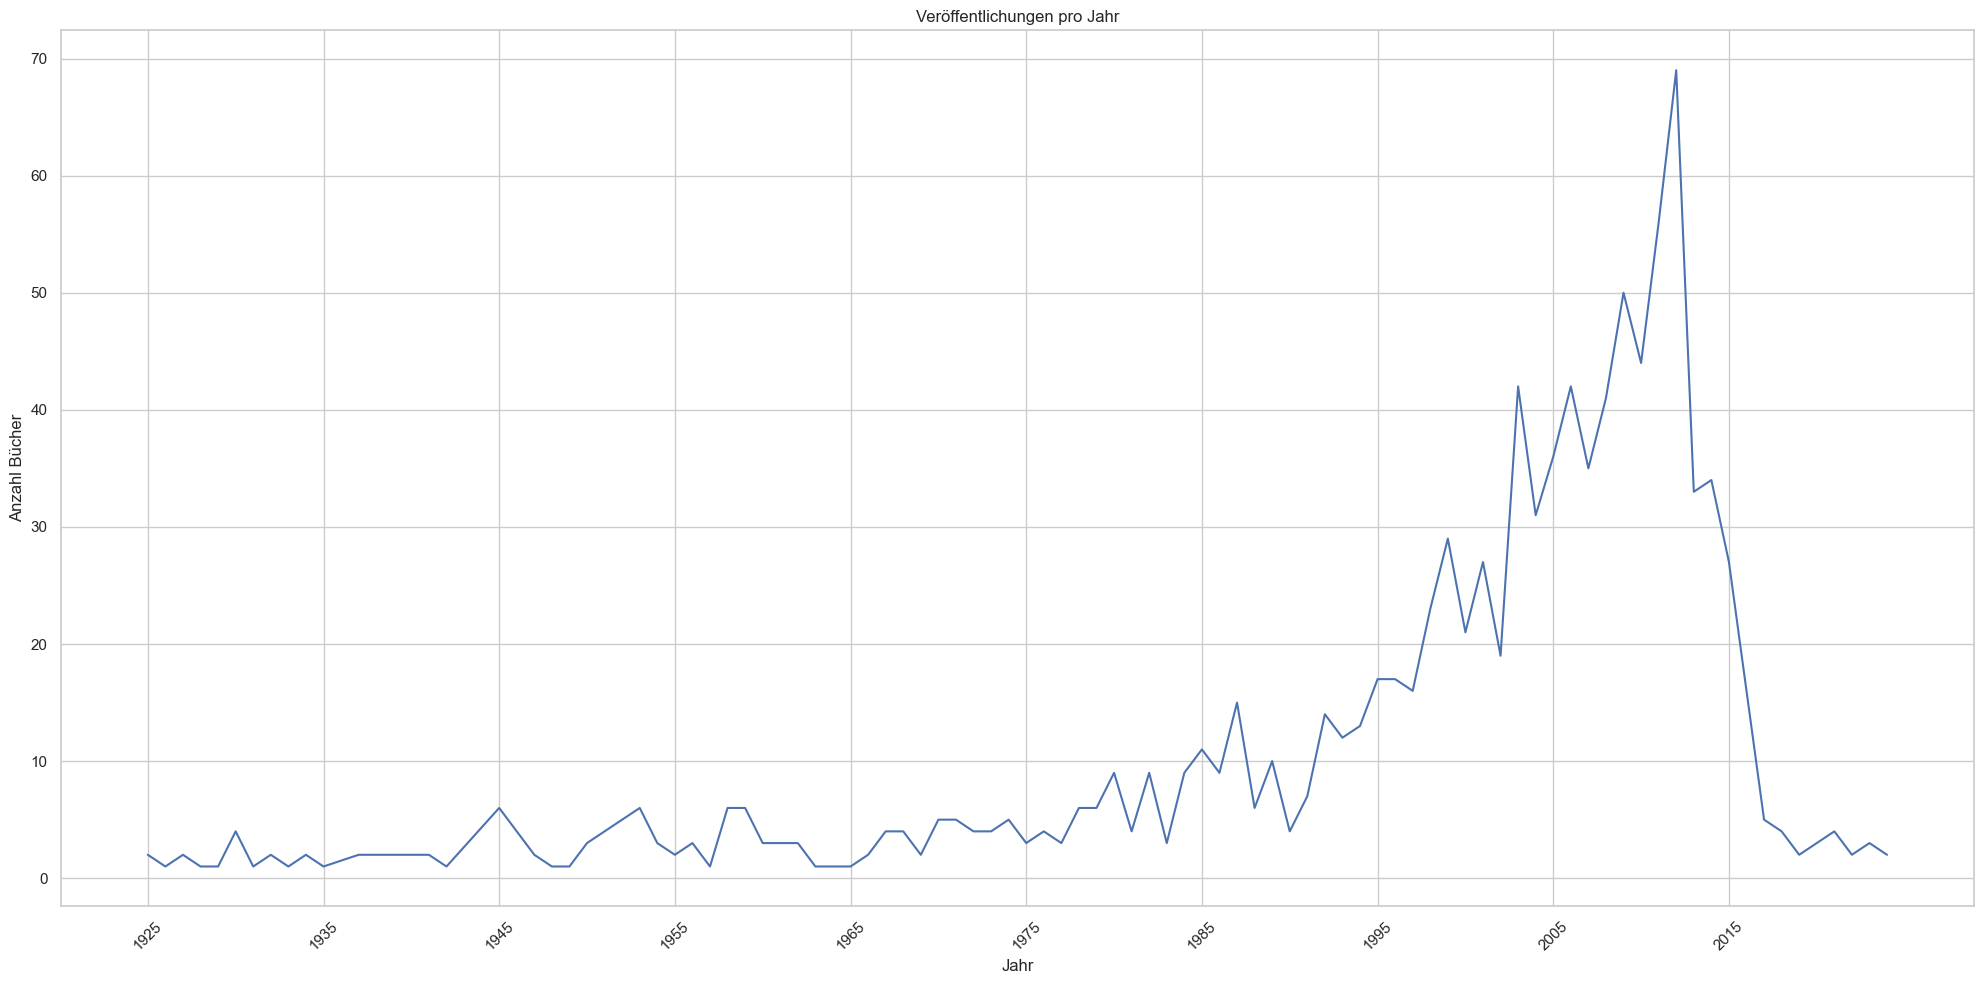

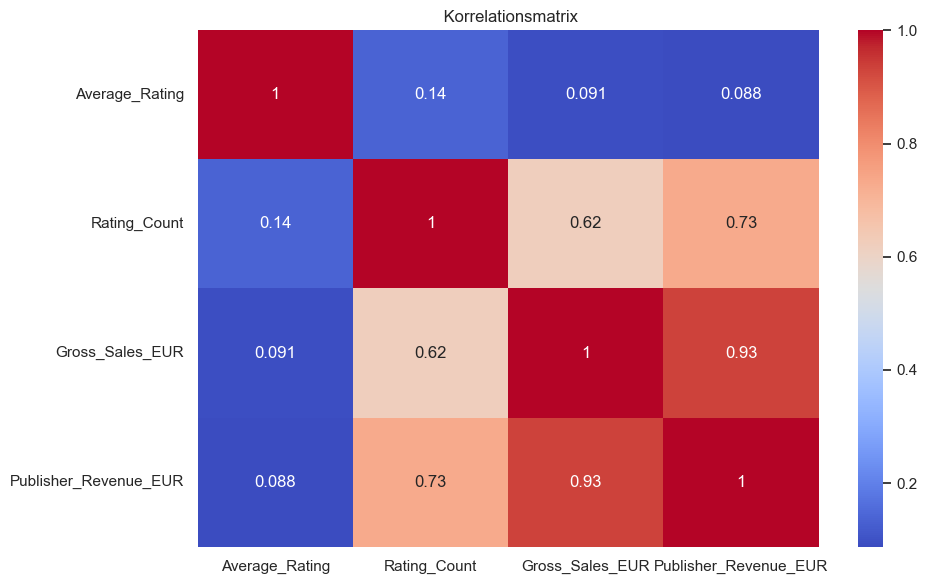

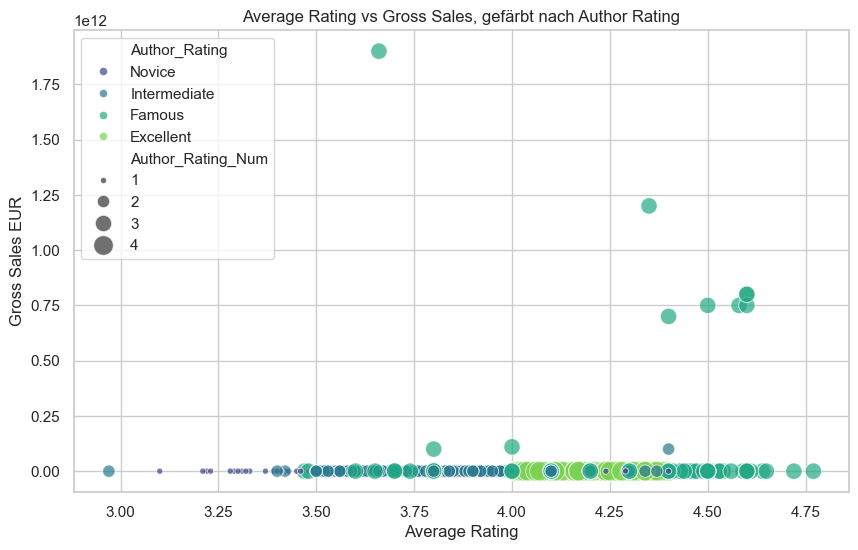

C:\Users\evovtch\AppData\Local\Temp\ipykernel_24956\1388598445.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=film_adoption_rate.index, y=film_adoption_rate.values, palette="coolwarm")


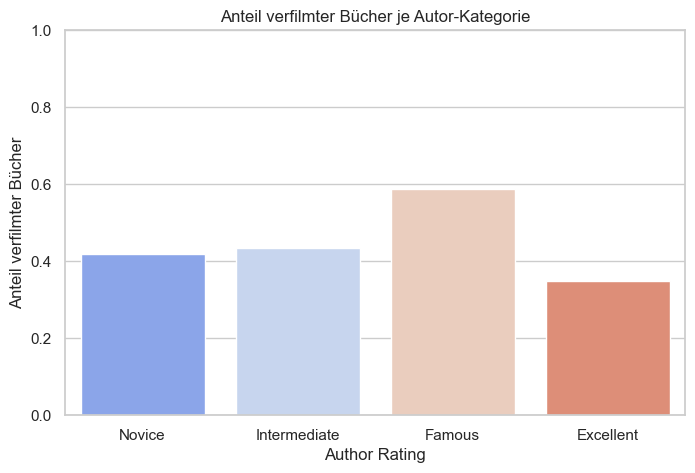

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Bereinigte Datei laden
df = pd.read_csv("book_data_clean.csv", sep=";", encoding="utf-8")

# 🧐 Überblick
print("📊 Vorschau:")
print(df.head())
print("\n🔍 Spalten:")
print(df.columns)
print("\n📈 Statistik:")
print(df.describe(include="all"))

# 🎨 Stil setzen (optional)
sns.set(style="whitegrid")

# 📌 Beispiel 1: Verteilung der Genres
plt.figure(figsize=(12, 6))
df["Genre"].value_counts().head(15).plot(kind="bar", title="Top 15 Genres")
plt.xlabel("Genre")
plt.ylabel("Anzahl Bücher")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📌 Beispiel 2: Durchschnittliche Bewertung nach Genre
plt.figure(figsize=(12, 6))
genre_rating = (
    df.groupby("Genre")["Average_Rating"].mean().sort_values(ascending=False).head(15)
)
genre_rating.plot(kind="bar", title="Durchschnittliche Bewertung nach Genre")
plt.xlabel("Genre")
plt.ylabel("Ø Bewertung")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Beispiel 3: Veröffentlichungen pro Jahr
plt.figure(figsize=(20, 10))


year_counts = df["Publishing_Year"].value_counts().sort_index()
year_counts.plot(kind="line", title="Veröffentlichungen pro Jahr")

# 🗓️ X-Achse mit 10-Jahres-Sprüngen
start_year = int(df["Publishing_Year"].min())
end_year = int(df["Publishing_Year"].max())
plt.xticks(
    ticks=range(start_year, end_year + 1, 10),  # z. B. 1970, 1980, ..., 2020
    rotation=45
)

plt.xlabel("Jahr")
plt.ylabel("Anzahl Bücher")
plt.tight_layout()
plt.grid(True)
plt.show()



#  Beispiel 4: Korrelationen
plt.figure(figsize=(10, 6))
sns.heatmap(
    df[
        ["Average_Rating", "Rating_Count", "Gross_Sales_EUR", "Publisher_Revenue_EUR"]
    ].corr(),
    annot=True,
    cmap="coolwarm",
)
plt.title(" Korrelationsmatrix")
plt.tight_layout()
plt.show()


#  Nur relevante Spalten auswählen
pairplot_data = df[
    ["Average_Rating", "Rating_Count", "Gross_Sales_EUR", "Publisher_Revenue_EUR"]
]

#  Optional: NaNs entfernen (Pairplot kann keine NaNs)
pairplot_data = pairplot_data.dropna()

#  Pairplot erstellen
#sns.pairplot(pairplot_data, kind="scatter", plot_kws={"alpha": 0.6, "s": 40})
#plt.suptitle(" Paarweise Beziehungen", fontsize=16, y=1.02)
#plt.tight_layout()
#plt.show()

rating_order = {
    "Novice": 1,
    "Intermediate": 2,
    "Famous": 3,
    "Excellent": 4
}
df['Author_Rating_Num'] = df['Author_Rating'].map(rating_order)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="Average_Rating",
    y="Gross_Sales_EUR",
    hue="Author_Rating",
    size="Author_Rating_Num",
    sizes=(20, 200),
    alpha=0.7,
    palette="viridis"
)
plt.title("Average Rating vs Gross Sales, gefärbt nach Author Rating")
plt.xlabel("Average Rating")
plt.ylabel("Gross Sales EUR")
plt.show()

# Mapping Author_Rating in Kategorien, falls noch nicht gemacht
rating_order = ["Novice", "Intermediate", "Famous", "Excellent"]

# Group by Author_Rating und Anteil der verfilmten Bücher berechnen
film_adoption_rate = df.groupby("Author_Rating")["Adapted_to_Film"].mean().reindex(rating_order)

plt.figure(figsize=(8,5))
sns.barplot(x=film_adoption_rate.index, y=film_adoption_rate.values, palette="coolwarm")
plt.title("Anteil verfilmter Bücher je Autor-Kategorie")
plt.xlabel("Author Rating")
plt.ylabel("Anteil verfilmter Bücher")
plt.ylim(0, 1)
plt.show()